In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [1]:
import numpy as np

In [3]:
n = 2
m = 2

In [4]:
from utils.DataGetter import DataGetter

N1 = (2 * n + 1) ** 3
N2 = m ** 3

d = DataGetter()
datas_names = [
    DataGetter.STANDFORD_HARDI_DATA,
    #DataGetter.TAIWAN_NTU_DSI_DATA,
    #DataGetter.SHERBROOKE_3SHELL_DATA
]

datas = d.get_data(datas_names)

/home/leexgo1987/apps/anaconda2/lib/python2.7/site-packages/skimage/filter/__init__.py:6: skimage_deprecation: The `skimage.filter` module has been renamed to `skimage.filters`.  This placeholder module will be removed in v0.13.
  warn(skimage_deprecation('The `skimage.filter` module has been renamed '


Dataset is already in place. If you want to fetch it again please first remove the folder /home/leexgo1987/.dipy/stanford_hardi 
Dataset is already in place. If you want to fetch it again please first remove the folder /home/leexgo1987/.dipy/stanford_hardi 


In [33]:
img = datas['standfor_hardi']['img']
print img.shape
data = np.zeros((82, 106, 76, 160))
data[:81, :, :, :] = img.get_data()
data.shape, img.shape


(81, 106, 76, 160)


((82, 106, 76, 160), (81, 106, 76, 160))

In [34]:
from utils import img_utils

lr, affine = img_utils.downsampling(img, 2)
lr.shape

(41, 53, 38, 160)

(839.0, 818)

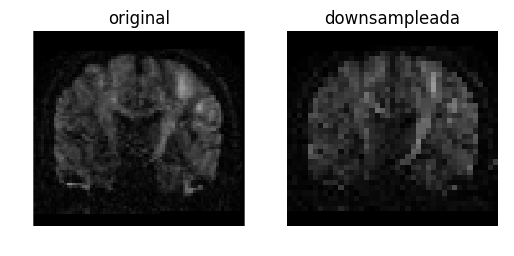

In [41]:
img_utils._isc(data, lr, b=30, titles=['original', 'downsampleada'], vmax=800)
data[:,:,:,30].max(), lr[:,:,:,30].max(), 


In [46]:
reload(img_utils)
hr = img_utils.downsampling2(lr, 0.5)


In [48]:
hr = hr[1:-1, 1:-1, :,:]
hr.shape, data.shape, lr.shape

((82, 106, 76, 160), (82, 106, 76, 160), (41, 53, 38, 160))

<module 'matplotlib.pyplot' from '/home/leexgo1987/apps/anaconda2/lib/python2.7/site-packages/matplotlib/pyplot.pyc'>

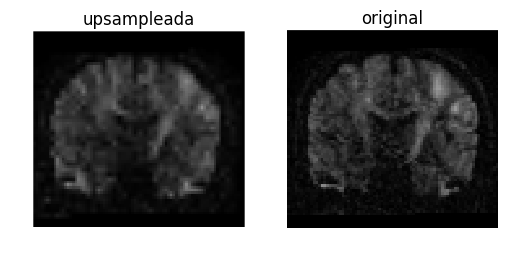

In [49]:
img_utils._isc(hr, img.get_data(), b=30, titles=['upsampleada', 'original'], vmax=800)

In [52]:
mse = ((hr-data)**2).mean()
print mse

7512.97298209


In [58]:
msei = np.divide(np.absolute(hr-data), data)

msei.shape

/home/leexgo1987/apps/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: RuntimeWarning: divide by zero encountered in divide
  if __name__ == '__main__':
/home/leexgo1987/apps/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: RuntimeWarning: invalid value encountered in divide
  if __name__ == '__main__':


(82, 106, 76, 160)

(nan, nan)

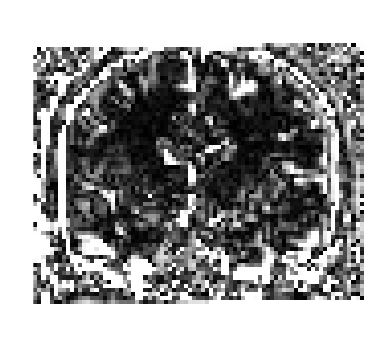

In [61]:
img_utils._is(msei, vmax=1)
msei.min(), msei.max()